In [ ]:
#bismillah bisa kelar
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt


##Import Data

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_1.xlsx")
df1.rename(columns = {'sentiment':'Sentiment'}, inplace = True)

In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_2.xlsx")
df2 #= df2['text', 'Sentiment']

,Unnamed: 0,text,Sentiment
0,1000,Dinas Kesehatan Aceh Utara Usulkan 376.000 Via...,NaN
1,1001,"Gemparkan Warga Langsa, Bayi Perempuan Ditemuk...",NaN
2,1002,Ini Efek yang Langsung Dirasakan Usai Disuntik...,NaN
3,1003,Ayo poling suka-suka santai\n\nJika sekarang a...,NaN
4,1004,Pemkab Aceh Barat Pastikan Imunisasi Vaksin Si...,positif
...,...,...,...
995,1995,Grand Zuri Dumai ikut sukseskan #vaksinasi #co...,NaN
996,1996,#Vaksin #BreakingNews #BREAKING #COVID19 #Coro...,NaN
997,1997,"SIAP DI VAKSIN, Mari Kita sukseskan Vaksinasi ...",positif
998,1998,China Lockdown Lagi Bikin Harga Minyak Dunia L...,NaN


In [ ]:
df3 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_3.xlsx")
df3# = df3['text', 'Sentiment']

,Unnamed: 0,text,Sentiment
0,2000,"Vaksinasi itu pertaruhan. Bisa berhasil, bisa ...",NaN
1,2001,Ketua KPCPEN Airlangga Ingatkan Tetap Disiplin...,NaN
2,2002,Vaksinasi: Telaah Sosilogis\n\n#MUI #Vaksin #V...,NaN
3,2003,#StayHome #dirumahaja #VaksinYoVaksin #vaksina...,NaN
4,2004,Raffi Ahmad Digugat ke Pengadilan Tak Terapkan...,NaN
...,...,...,...
2014,4013,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
2015,4014,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
2016,4015,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
2017,4016,"vaksin ga jelas, gw gamau vaksin",negatif


##Menggabungkan ketiga data menjadi satu dataframe

In [ ]:
df = pd.concat([df1,df2,df3])
df.reset_index(drop=True, inplace = True)
df

,Unnamed: 0,text,Sentiment
0,0,vaksin untuk indonesia,positif
1,1,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,positif
2,2,Sistem satu data mendukung Vaksinasi di Indone...,positif
3,3,Siap menerima vaksin covid 19 vaksinhalal vak...,positif
4,4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,positif
...,...,...,...
3950,4013,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
3951,4014,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
3952,4015,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
3953,4016,"vaksin ga jelas, gw gamau vaksin",negatif


#Data Preprocessing

In [ ]:
##mengambil data teks dan sentimen
df = pd.DataFrame(df[['text','Sentiment']])
df

,text,Sentiment
0,vaksin untuk indonesia,positif
1,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,positif
2,Sistem satu data mendukung Vaksinasi di Indone...,positif
3,Siap menerima vaksin covid 19 vaksinhalal vak...,positif
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,positif
...,...,...
3950,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
3951,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
3952,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
3953,"vaksin ga jelas, gw gamau vaksin",negatif


##menghapus @.. dan hashtag, menghapus url, link, dan karakter spesial

In [ ]:
df['text'] = df['text'].str.replace('(@\w+.*?)',"")
df['text'] = df['text'].str.replace('(#\w+.*?)',"")
df['text'] = df['text'].str.replace('(&\w+.*?)',"")
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['text'] = df['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
df['text'] = df['text'].str.replace(r"[0-9]", '')
df['text'] = df['text'].str.replace(r'  ', ' ')
df['text'] = df['text'].str.replace(r'   ', ' ')
df['text'] = df['text'].str.replace(r"[\,\+\_\-\:\!\%\;\/\\]", ' ')

In [ ]:
#menghapus single char
# remove single char
def remove_singl_char(teks):
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

df['text'] = df['text'].apply(remove_singl_char)

In [ ]:
#remove whitespace
def remove_whitespace_LT(teks):
    return teks.strip()

df['text'] = df['text'].apply(remove_whitespace_LT)

In [ ]:
#remove multiple whitespace
def remove_whitespace_multiple(teks):
    return re.sub('\s+',' ',teks)

df['text'] = df['text'].apply(remove_whitespace_multiple)

In [ ]:
#remove punctuation
def remove_punctuation(teks):
    return teks.translate(str.maketrans("","",string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)

In [ ]:
#mengubah semua huruf menjadi huruf kecil
df['text'] = df['text'].str.lower()
df

,text,Sentiment
0,vaksin untuk indonesia,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3950,jangan vaksin saudara saudara itu hanya akal a...,negatif
3951,vaksin itu gajelas asal usulnya olahraga saja ...,negatif
3952,gamau vaksin ah permainan bisnis mending melak...,negatif
3953,vaksin ga jelas gw gamau vaksin,negatif


In [ ]:
df['text'] = df['text'].str.replace('\n', ' ')
df['text'] = df['text'].str.replace('...$', '*')

In [ ]:
#menghilangkan teks yang mengandung akhiran titik 3 (contoh: men...)
df_titik_ilang=[]
for i in df.index:
  #re.sub("[A-Za-z0-9]+\.{3}", "", df['text'][i])
  df_titik_ilang.append(re.sub("[A-Za-z0-9]+\*", "", df['text'][i]))

df['text'] = pd.DataFrame(df_titik_ilang)


In [ ]:
df['text'] = df['text'].str.replace('*', '')

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3950,jangan vaksin saudara saudara itu hanya akal a...,negatif
3951,vaksin itu gajelas asal usulnya olahraga saja,negatif
3952,gamau vaksin ah permainan bisnis mending melak...,negatif
3953,vaksin ga jelas gw gamau,negatif


##Mengisi teks sentimen NaN menjadi Netral

In [ ]:
df.isna().sum()

text            0
Sentiment    2592
dtype: int64

In [ ]:
#df.loc[df.Sentiment['netral'](), :]

In [ ]:
df.Sentiment.fillna(value="netral", inplace=True)

In [ ]:
#df.dropna(inplace=True), ini tidak terpakai karena revisi
df.reset_index(drop=True, inplace = True)

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3950,jangan vaksin saudara saudara itu hanya akal a...,negatif
3951,vaksin itu gajelas asal usulnya olahraga saja,negatif
3952,gamau vaksin ah permainan bisnis mending melak...,negatif
3953,vaksin ga jelas gw gamau,negatif


##Menghilangkan teks duplikat

In [ ]:
df.text.duplicated().sum()

340

In [ ]:
df.loc[df.text.duplicated(), :]

,text,Sentiment
378,guys sekarang ini lagi ramai soal vaksin nah t...,netral
903,arifinnkri dukung vaksinasi untuk,positif
905,arifinnkri dukung vaksinasi untuk,positif
920,arifinnkri dukung vaksinasi untuk,positif
930,arifinnkri dukung vaksinasi untuk,positif
...,...,...
3898,jangan percaya teori konspirasi vaksin ada unt...,positif
3899,vaksin ada untuk kebaikan,positif
3900,vaksinasi merupakan usaha untuk mencegah covid...,positif
3901,covid teratasi ekonomi maju mari kita sukseska...,positif


In [ ]:
df = df.drop_duplicates(subset=["text"])
df.reset_index(drop=True, inplace = True)

In [ ]:
df.text.duplicated().sum()

0

In [ ]:
df.shape

(3615, 2)

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3610,jangan vaksin saudara saudara itu hanya akal a...,negatif
3611,vaksin itu gajelas asal usulnya olahraga saja,negatif
3612,gamau vaksin ah permainan bisnis mending melak...,negatif
3613,vaksin ga jelas gw gamau,negatif


##Menghapus semua emmoticon

In [ ]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3610,jangan vaksin saudara saudara itu hanya akal a...,negatif
3611,vaksin itu gajelas asal usulnya olahraga saja,negatif
3612,gamau vaksin ah permainan bisnis mending melak...,negatif
3613,vaksin ga jelas gw gamau,negatif


####Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
Positive = df[df.Sentiment == 'positif']
Negative = df[df.Sentiment == 'negatif']
Neutral = df[df.Sentiment == 'netral']

# Create numpy list to visualize using wordcloud
Positive_text = " ".join(Positive['text'].to_numpy().tolist())
Negative_text = " ".join(Negative['text'].to_numpy().tolist())
Neutral_text = " ".join(Neutral['text'].to_numpy().tolist())


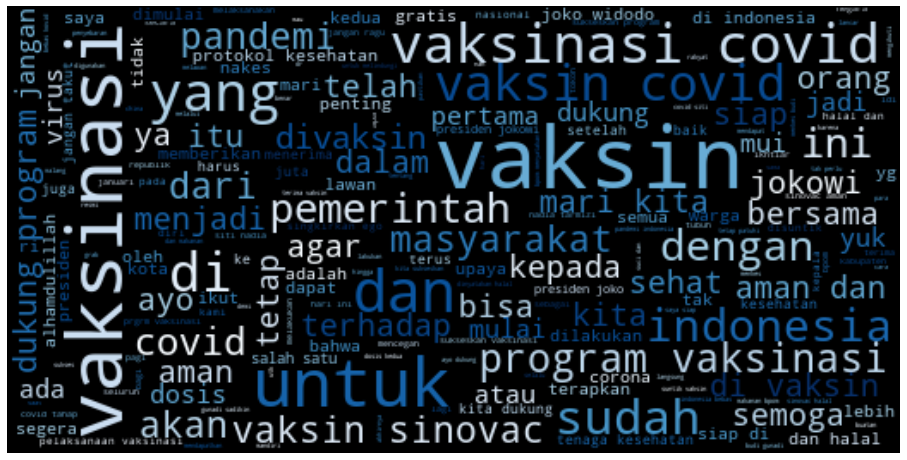

In [ ]:
# wordcloud of Business Title
Positive_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(Positive_text)
plt.figure(figsize=(16,10))
plt.imshow(Positive_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

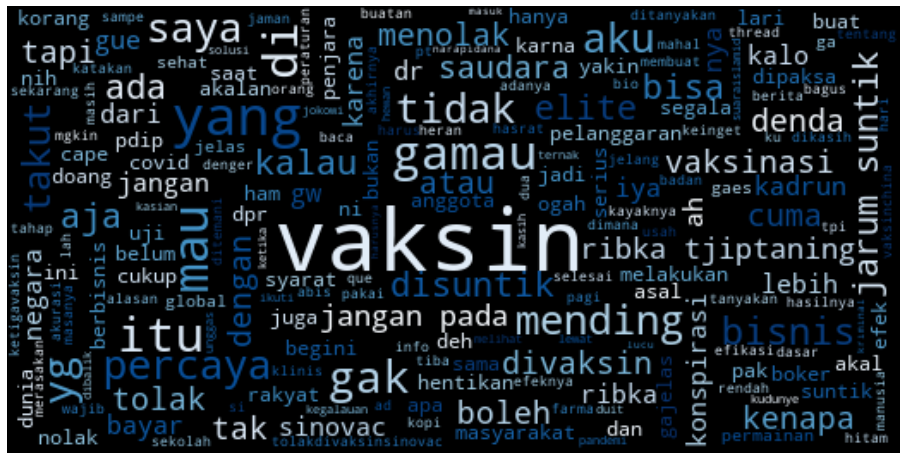

In [ ]:
# wordcloud of Business Title
Negative_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(Negative_text)
plt.figure(figsize=(16,10))
plt.imshow(Negative_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

##Melihat data target 

In [ ]:
#label encoding, menjadikan nilai negatif = 0 & positif = 1
df['Target_type']= df['Sentiment'].map({'negatif': 0,'[p':2, 'o':2, 'op':2, 'positif':2,'netral':1})
df

,text,Sentiment,Target_type
0,vaksin untuk,positif,2
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif,2
2,sistem satu data mendukung vaksinasi di indone...,positif,2
3,siap menerima vaksin covid vaksinhalal vaksins...,positif,2
4,apa perbedaan vaksin china sinovac dan sinopha...,positif,2
...,...,...,...
3610,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
3611,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
3612,gamau vaksin ah permainan bisnis mending melak...,negatif,0
3613,vaksin ga jelas gw gamau,negatif,0


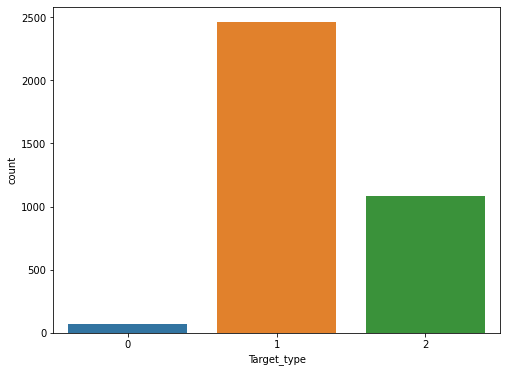

In [ ]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df.Target_type)

###Dikarenakan data negatif sangat sedikit, maka dilakukan oversampling agar akurasi model dapat ditingkatkan

In [ ]:
#Melakukan Oversampling
df_negatif = df.loc[df.Sentiment == 'negatif']
df_negatif_gabungan = pd.concat([df_negatif,df_negatif,df_negatif,df_negatif])
df_negatif_gabungan.reset_index(drop = True, inplace = True)
df_negatif_gabungan

,text,Sentiment,Target_type
0,tidak usah lah tanyakan mau atau tidak disunti...,negatif,0
1,info boker pagi ini ditemani kopi hitam buatan...,negatif,0
2,heran kenapa masih pakai sinovac lebih mahal i...,negatif,0
3,nih denger tolakdivaksinsinovac,negatif,0
4,abis baca tentang thread vaksin sinovac dr efi...,negatif,0
...,...,...,...
283,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
284,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
285,gamau vaksin ah permainan bisnis mending melak...,negatif,0
286,vaksin ga jelas gw gamau,negatif,0


In [ ]:
#menggabungkan data minor oversampling ke dalam dataset
data_final = pd.concat([df,df_negatif_gabungan])
data_final.reset_index(drop=True, inplace = True)
data_final

,text,Sentiment,Target_type
0,vaksin untuk,positif,2
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif,2
2,sistem satu data mendukung vaksinasi di indone...,positif,2
3,siap menerima vaksin covid vaksinhalal vaksins...,positif,2
4,apa perbedaan vaksin china sinovac dan sinopha...,positif,2
...,...,...,...
3898,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
3899,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
3900,gamau vaksin ah permainan bisnis mending melak...,negatif,0
3901,vaksin ga jelas gw gamau,negatif,0


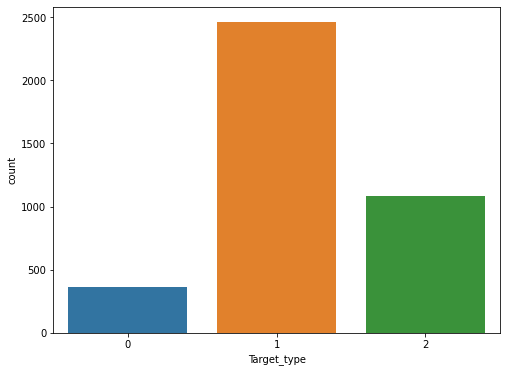

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data_final.Target_type)

####Statistik Data

In [ ]:
data_final.groupby('Target_type').describe().T

Target_type                                                       0       1  \
text      count                                                 360    2459   
          unique                                                 72    2458   
          top     tidak usah lah tanyakan mau atau tidak disunti...           
          freq                                                    5       2   
Sentiment count                                                 360    2459   
          unique                                                  1       1   
          top                                               negatif  netral   
          freq                                                  360    2459   

Target_type                   2  
text      count            1084  
          unique           1084  
          top     vaksin untuk   
          freq                1  
Sentiment count            1084  
          unique              4  
          top           positif  
          freq             1079

##Tokenisasi

In [ ]:
def token(text):
  nstr = text.split(" ")
  dt = []
  a = -1
  for i in nstr:
    a = a + 1
  if i == '':
    dt.append(a)
  p = 0
  b = 0
  for q in dt:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

In [ ]:
data_final['text'] = data_final['text'].apply(token)

In [ ]:
data_final

,text,Sentiment,Target_type
0,"[vaksin, untuk]",positif,2
1,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...",positif,2
2,"[sistem, satu, data, mendukung, vaksinasi, di,...",positif,2
3,"[siap, menerima, vaksin, covid, vaksinhalal, v...",positif,2
4,"[apa, perbedaan, vaksin, china, sinovac, dan, ...",positif,2
...,...,...,...
3898,"[jangan, vaksin, saudara, saudara, itu, hanya,...",negatif,0
3899,"[vaksin, itu, gajelas, asal, usulnya, olahraga...",negatif,0
3900,"[gamau, vaksin, ah, permainan, bisnis, mending...",negatif,0
3901,"[vaksin, ga, jelas, gw, gamau]",negatif,0


##Menghapus Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/dataset TA/stopwordbahasa.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_final['text'] = data_final['text'].apply(stopwords_removal) 


data_final['text'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                             [vaksin]
1    [kenal, kebal, vaksin, bukti, manusia, berjuan...
2    [sistem, data, mendukung, vaksinasi, indonesia...
3    [menerima, vaksin, covid, vaksinhalal, vaksins...
4    [perbedaan, vaksin, china, sinovac, sinopharm,...
5    [obat, selamatkan, nyawa, pasien, ditemukan, i...
6    [vaksin, buatan, tiongkok, orang, tua, suntik,...
7    [kabar, duka, dokter, pribadi, paus, fransisku...
8    [masker, bekas, rawan, tertular, virus, pakai,...
9    [wakil, supervisor, kab, kota, terlatih, rumah...
Name: text, dtype: object

##Stemming menggunakan sastrawi

In [ ]:
!pip install Sastrawi
!pip install swifter
#import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_final['text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_final['text'] = data_final['text'].swifter.apply(get_stemmed_term)
print(data_final['text'])

Output streaming akan dipotong hingga 5000 baris terakhir.
akurasi : akurasi
rendah : rendah
tayib : tayib
muiorid : muiorid
udahlah : udahlah
berubah : ubah
bergerak : gerak
umur : umur
takkan : tak
ditentukan : tentu
tolakdivaksinsinovac : tolakdivaksinsinovac
sih : sih
jt : jt
lo : lo
kasian : kasi
ribu : ribu
pejabat : jabat
tokoh : tokoh
bingung : bingung
perihal : perihal
swipe : swipe
left : left
humassetdapati : humassetdapati
patilawancorona : patilawancorona
bandara : bandara
hatta : hatta
denger : denger
bulk : bulk
biofarma : biofarma
soetta : soetta
kader : kader
golkar : golkar
maju : maju
airlangga : airlangga
hrt : hrt
dpp : dpp
dibanding : banding
an : an
faktor : faktor
istana : istana
depkes : depkes
suka : suka
menghayal : menghayal
sadarlah : sadar
khayalanmu : khayal
terwujud : wujud
kau : kau
duduk : duduk
cari : cari
manfaatkan : manfaat
sertifikat : sertifikat
memasarkan : pasar
uu : uu
no : no
pasal : pasal
poin : poin
berhak : hak
mandiri : mandiri
bertanggun

Pandas Apply:   0%|          | 0/3903 [00:00<?, ?it/s]

0                                                [vaksin]
1       [kenal, kebal, vaksin, bukti, manusia, juang, ...
2       [sistem, data, dukung, vaksinasi, indonesia, v...
3       [terima, vaksin, covid, vaksinhalal, vaksinsia...
4       [beda, vaksin, china, sinovac, sinopharm, mere...
                              ...                        
3898    [vaksin, saudara, saudara, akal, akal, elite, ...
3899                    [vaksin, gajelas, usul, olahraga]
3900    [gamau, vaksin, ah, main, bisnis, mending, akt...
3901                              [vaksin, ga, gw, gamau]
3902                       [vaksin, gaes, mending, tidur]
Name: text, Length: 3903, dtype: object


df.to_csv('dataset_bersih.csv')

In [ ]:
#data_final.to_csv('dataset_bersih.csv')

#Permodelan


In [ ]:
# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#save checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers,initializers
from sklearn.model_selection import StratifiedKFold 

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
X = data_final['text'].values
y = data_final['Target_type'].values

In [ ]:
X

array([list(['vaksin']),
       list(['kenal', 'kebal', 'vaksin', 'bukti', 'manusia', 'juang', 'jaga', 'eksistensi', 'dunia', 'vaksin']),
       list(['sistem', 'data', 'dukung', 'vaksinasi', 'indonesia', 'vaksin', 'covid']),
       ...,
       list(['gamau', 'vaksin', 'ah', 'main', 'bisnis', 'mending', 'aktivitas']),
       list(['vaksin', 'ga', 'gw', 'gamau']),
       list(['vaksin', 'gaes', 'mending', 'tidur'])], dtype=object)

In [ ]:
y

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
# Split data into train, val and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

array([list(['sahih', 'badan', 'awas', 'obat', 'makan', 'utara', 'tuju', 'vaksin']),
       list(['sinovac', 'turun', 'infeksi', 'covid', 'persen']),
       list(['vaksin', 'covid', 'jefridin', 'jaga', 'protokol', 'sehat']),
       ...,
       list(['pdip', 'ribka', 'tjiptaning', 'ingat', 'mafia', 'impor', 'program', 'vaksin']),
       list(['lembaga', 'think', 'tank', 'skala']),
       list(['pasien', 'konfirmasi', 'positif', 'covid', 'kota', 'metro', 'tambah'])],
      dtype=object)

#### testing

In [ ]:
# Defining parameters
max_len = 80
trunc_type = "post" # 80 Kata Pertama.. "pre" -> 80 Kata Terakhir
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 14202 #jumlah maksimum kata yang disimpan
kata_test = ["saya takut jarum suntik dan gamau vaksin"]
kata_test_netral = ["tenaga kesehatan akan disuntik vaksin hari ini"]
kata_test_positif = ["saya mendukung program vaksin dan vaksin sinovac sudah dipastikan suci dan halal dan ayo kita sukseskan program vaksinasi ini"]
# embedding_dim = 16
# drop_value = 0.2 

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok) #if True, every character will be treated as a token.
tokenizer.fit_on_texts(x_train)

#### save tokenizer

In [ ]:
import io
import json
from keras_preprocessing.text import tokenizer_from_json
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer_3class.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

#### Mohon maaf pak, untuk proses memunculkan proses tokenize (word index) tidak dapat dilakukan di user interface karena saya menggunakan fungsi tokenize dari keras, dibawah ini merupakan proses token word indexnya:

In [ ]:
# Get the word_index by using tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'vaksin': 2,
 'vaksinasi': 3,
 'covid': 4,
 'suntik': 5,
 'sinovac': 6,
 'jokowi': 7,
 'indonesia': 8,
 'sehat': 9,
 '': 10,
 'presiden': 11,
 'terima': 12,
 'orang': 13,
 'yg': 14,
 'perintah': 15,
 'masyarakat': 16,
 'program': 17,
 'tahap': 18,
 'kota': 19,
 'pandemi': 20,
 'aman': 21,
 'corona': 22,
 'halal': 23,
 'raffi': 24,
 'rakyat': 25,
 'ahmad': 26,
 'tolak': 27,
 'dukung': 28,
 'takut': 29,
 'ya': 30,
 'laksana': 31,
 'dosis': 32,
 'tenaga': 33,
 'gak': 34,
 'negara': 35,
 'dokter': 36,
 'jalan': 37,
 'sunti': 38,
 'virus': 39,
 'percaya': 40,
 'kabupaten': 41,
 'dr': 42,
 'sukses': 43,
 'aja': 44,
 'ribka': 45,
 'widodo': 46,
 'protokol': 47,
 'joko': 48,
 'lampung': 49,
 'nakes': 50,
 'ri': 51,
 'bpom': 52,
 'mari': 53,
 'yuk': 54,
 'sakit': 55,
 'efek': 56,
 'news': 57,
 'januari': 58,
 'perdana': 59,
 'warga': 60,
 'uji': 61,
 'pakai': 62,
 'menkes': 63,
 'tangan': 64,
 'gratis': 65,
 'ikut': 66,
 'gubernur': 67,
 'upaya': 68,
 'ga': 69,
 'positif': 70,
 'k

In [ ]:
# Sequencing and padding on training and testing 
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
test_masukan = tokenizer.texts_to_sequences(kata_test)
test_masukan1 = tokenizer.texts_to_sequences(kata_test_netral)
test_masukan2 = tokenizer.texts_to_sequences(kata_test_positif)

train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_masukan_padded = pad_sequences(test_masukan, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_masukan1_padded = pad_sequences(test_masukan1, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_masukan2_padded = pad_sequences(test_masukan2, maxlen = max_len, padding = padding_type, truncating=trunc_type)

In [ ]:
print('Shape of train tensor: ', train_padded.shape)
print('Shape of test tensor: ', test_padded.shape)

Shape of train tensor:  (3122, 80)
Shape of test tensor:  (781, 80)


In [ ]:
print(train_padded)

[[1926   76  162 ...    0    0    0]
 [   6  355  356 ...    0    0    0]
 [   2    4 1927 ...    0    0    0]
 ...
 [ 238   45  110 ...    0    0    0]
 [ 710 4036 4037 ...    0    0    0]
 [ 192  178   70 ...    0    0    0]]


In [ ]:
print(test_padded)

[[1266    1 1064 ...    0    0    0]
 [  74    1  463 ...    0    0    0]
 [   1 1653  105 ...    0    0    0]
 ...
 [1910    0    0 ...    0    0    0]
 [   2    6  212 ...    0    0    0]
 [  74  370  542 ...    0    0    0]]


In [ ]:
print(test_masukan_padded)

[[  1  29 125   5   1  80   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]]


In [ ]:
embeding_dim = 16

In [ ]:
vocab_size


14202

In [ ]:
len(word_index) + 1

4039

In [ ]:
#Dense model architecture -> Bidirectional
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embeding_dim,input_length=max_len)) # Layer Input
model.add(layers.Bidirectional(layers.LSTM(100)))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(3,activation='softmax')) # Hidden 3
#model.add(activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 16)            227232    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              93600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 327,363
Trainable params: 327,363
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model checkpoint
#ModelCheckpoint = ModelCheckpoint('model_bilstm.h5',monitor='val_loss',save_weights_only=False, verbose=0, save_best_only=True, mode='auto')

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Loss = rumus menghitung besarnya perbedaan antara target hasil dari deep learning dengan target asli
# Optimizer = Rumus yang dipakai untuk deep learning memperbagus diri setiap kali epoch(latihan)

In [ ]:
#Train with Stratified K Fold
num_epochs = 32 #32 Kali Latihan
early_stop = EarlyStopping(monitor="val_loss",patience = 2) # 

kf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)#revisi untuk percobaan 3,5,7,9,11

for train_index, val_index in kf.split(train_padded, y_train):
    x_train_kf, x_val_kf = train_padded[train_index], train_padded[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
    
    history = model.fit(x_train_kf, 
                    y_train_kf, 
                    epochs=num_epochs,
                    validation_data=(x_val_kf,y_val_kf),
                    callbacks = [early_stop],
                    verbose=1)

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


79/79 [==============================] - 27s 280ms/step - loss: 0.8731 - accuracy: 0.6312 - val_loss: 0.8305 - val_accuracy: 0.6320
Epoch 2/32
79/79 [==============================] - 18s 230ms/step - loss: 0.7145 - accuracy: 0.6648 - val_loss: 0.6494 - val_accuracy: 0.7024
Epoch 3/32
79/79 [==============================] - 13s 164ms/step - loss: 0.4722 - accuracy: 0.8042 - val_loss: 0.5528 - val_accuracy: 0.7664
Epoch 4/32
79/79 [==============================] - 10s 122ms/step - loss: 0.3037 - accuracy: 0.8827 - val_loss: 0.6048 - val_accuracy: 0.7664
Epoch 5/32
79/79 [==============================] - 9s 119ms/step - loss: 0.2191 - accuracy: 0.9147 - val_loss: 0.6520 - val_accuracy: 0.7840
Epoch 1/32
79/79 [==============================] - 9s 119ms/step - loss: 0.2870 - accuracy: 0.8927 - val_loss: 0.1869 - val_accuracy: 0.9312
Epoch 2/32
79/79 [==============================] - 9s 120ms/step - loss: 0.2062 - accuracy: 0.9231 - val_loss: 0.2255 - val_accuracy: 0.9088
Epoch 3/32
79

In [ ]:
#import pickle
#with open('tokenizer.pickle', 'wb') as handle:
  #pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

####save model

In [ ]:
#model.save('BiLSTM_3class.h5')

In [ ]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss':'Training_Loss', 'accuracy':"Training_Accuracy", 'val_loss':'Validation_Loss', 'val_accuracy':"Validation_Accuracy"}, inplace = True)


In [ ]:
def plot_graphs1(var1,var2,string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel('Number of Epochs')
    plt.ylabel(string)
    plt.legend([var1,var2])

In [ ]:
plot_graphs1('Training_Loss','Validation_Loss', 'loss')

In [ ]:
plot_graphs1('Training_Accuracy','Validation_Accuracy', 'Accuracy')

In [ ]:
#print "Evaluate..."
#score = model.evaluate(x_test, y_test,batch_size=batch_size)

In [152]:
pred = (model.predict(test_padded))
acc = model.evaluate(test_padded, y_test)
proba_nn = model.predict(test_padded)

print("Test loss is {0:.2f} accuracyc is {1:.2f} ".format(acc[0],acc[1]))
pred33 = np.argmax(model.predict(test_padded),axis=-1)
#print(confusion_matrix(pred, y_test))
#pred33

25/25 [==============================] - 2s 62ms/step - loss: 1.1252 - accuracy: 0.7695
Test loss is 1.13 accuracyc is 0.77 


In [ ]:
confusion = confusion_matrix(pred33, y_test)
print('Confusion Matrix\n')
print(confusion)

Text(0.5, 15.0, 'Actual')

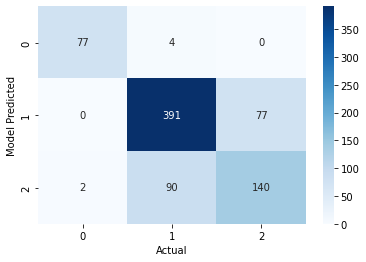

In [77]:
cf_matrix = confusion_matrix(pred33,y_test)
sns.heatmap(cf_matrix,annot=True, fmt='',cmap='Blues')
plt.ylabel('Model Predicted')
plt.xlabel('Actual')

In [78]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred33, target_names=['Class 0', 'Class 1', 'Class 2']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.95      0.97      0.96        79
     Class 1       0.84      0.81      0.82       485
     Class 2       0.60      0.65      0.62       217

    accuracy                           0.78       781
   macro avg       0.80      0.81      0.80       781
weighted avg       0.78      0.78      0.78       781



In [ ]:
pred1 = (model.predict(test_masukan_padded))
pred1
print(np.argmax(pred1))

In [ ]:
pred2 = (model.predict(test_masukan1_padded))
pred2
print(np.argmax(pred2))

In [ ]:
pred3 = (model.predict(test_masukan2_padded))
pred3
print(np.argmax(pred3))

In [ ]:
print(vocab_size)
print(max_len)
print(embeding_dim)

14202
80
16
